# HANDWRITTING RECOGNITION

In [ ]:
# Importing necessasry libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import ParameterGrid
from tensorflow.keras import layers, models

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Data visualization

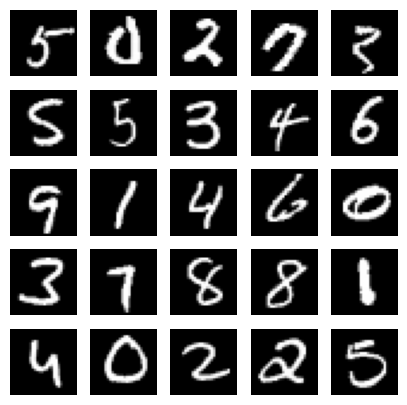

In [ ]:
# 25 sample image from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

## Data Preprocessing

In [ ]:
# resize and normalize
x_train = x_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)) / 255.0

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Model Architecture

In [ ]:
# Define the model architecture
model = models.Sequential([
    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Define a range of learning rates to try
learning_rates = [0.001, 0.01, 0.1]

# Train the model with each learning rate and record the validation accuracy
val_accs = []
for lr in learning_rates:
    opt = Adam(lr=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)
    val_accs.append(history.history['val_accuracy'][-1])

Epoch 1/5
469/469 [==============================] - 464s 986ms/step - loss: 0.3845 - accuracy: 0.8791 - val_loss: 0.0642 - val_accuracy: 0.9823
Epoch 2/5
469/469 [==============================] - 454s 968ms/step - loss: 0.1313 - accuracy: 0.9611 - val_loss: 0.0432 - val_accuracy: 0.9874
Epoch 3/5
469/469 [==============================] - 453s 966ms/step - loss: 0.0956 - accuracy: 0.9723 - val_loss: 0.0393 - val_accuracy: 0.9886
Epoch 4/5
469/469 [==============================] - 449s 959ms/step - loss: 0.0833 - accuracy: 0.9749 - val_loss: 0.0292 - val_accuracy: 0.9918
Epoch 5/5
469/469 [==============================] - 451s 963ms/step - loss: 0.0682 - accuracy: 0.9808 - val_loss: 0.0239 - val_accuracy: 0.9923


Epoch 1/5
469/469 [==============================] - 448s 950ms/step - loss: 0.0658 - accuracy: 0.9805 - val_loss: 0.0278 - val_accuracy: 0.9911
Epoch 2/5
469/469 [==============================] - 455s 970ms/step - loss: 0.0568 - accuracy: 0.9829 - val_loss: 0.0232 - val_accuracy: 0.9927
Epoch 3/5
469/469 [==============================] - 445s 949ms/step - loss: 0.0507 - accuracy: 0.9849 - val_loss: 0.0310 - val_accuracy: 0.9907
Epoch 4/5
469/469 [==============================] - 448s 955ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0239 - val_accuracy: 0.9924
Epoch 5/5
469/469 [==============================] - 447s 953ms/step - loss: 0.0406 - accuracy: 0.9871 - val_loss: 0.0242 - val_accuracy: 0.9926


Epoch 1/5
469/469 [==============================] - 452s 962ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0287 - val_accuracy: 0.9920
Epoch 2/5
469/469 [==============================] - 455s 971ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0215 - val_accuracy: 0.9939
Epoch 3/5
469/469 [==============================] - 463s 986ms/step - loss: 0.0336 - accuracy: 0.9888 - val_loss: 0.0199 - val_accuracy: 0.9942
Epoch 4/5
469/469 [==============================] - 458s 977ms/step - loss: 0.0311 - accuracy: 0.9898 - val_loss: 0.0296 - val_accuracy: 0.9904
Epoch 5/5
469/469 [==============================] - 451s 961ms/step - loss: 0.0310 - accuracy: 0.9902 - val_loss: 0.0252 - val_accuracy: 0.9943


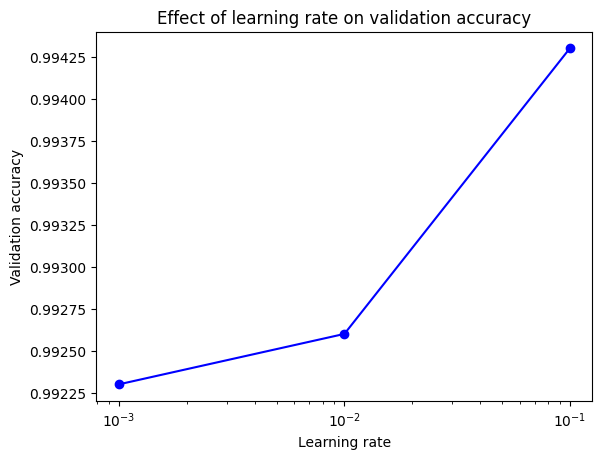

In [ ]:
# Plot the validation accuracy as a function of the learning rate
plt.plot(learning_rates, val_accs, 'bo-')
plt.xscale('log')
plt.xlabel('Learning rate')
plt.ylabel('Validation accuracy')
plt.title('Effect of learning rate on validation accuracy')
plt.show()

As we see, 0.1 is the best value for the learning rate

In [ ]:
# Optimize and Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit the model on the training data
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 525s 1s/step - loss: 0.3526 - accuracy: 0.8910 - val_loss: 0.0671 - val_accuracy: 0.9813
Epoch 2/5
469/469 [==============================] - 462s 984ms/step - loss: 0.1082 - accuracy: 0.9691 - val_loss: 0.0420 - val_accuracy: 0.9874
Epoch 3/5
469/469 [==============================] - 458s 977ms/step - loss: 0.0751 - accuracy: 0.9786 - val_loss: 0.0300 - val_accuracy: 0.9910
Epoch 4/5
469/469 [==============================] - 478s 1s/step - loss: 0.0626 - accuracy: 0.9827 - val_loss: 0.0372 - val_accuracy: 0.9885
Epoch 5/5
469/469 [==============================] - 455s 971ms/step - loss: 0.0522 - accuracy: 0.9853 - val_loss: 0.0295 - val_accuracy: 0.9909


In [ ]:
# Print the accuracy of the model on the test data
loss, acc = model.evaluate(x_test, y_test, batch_size=32)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 21s 68ms/step - loss: 0.0295 - accuracy: 0.9909

Test accuracy: 99.1%
